In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA,sarimax

In [4]:
data= pd.read_excel('basedonnees.xlsx', na_values=['na','-','I'],index_col=0, parse_dates=True)

In [13]:
colonnes=np.array(data.columns)
colonnes

array(['W2- Irradiance (W/m²)', 'W3 - Irradiance (W/m²)',
       'W4 - Irradiance (W/m²)', ' Temperature ambiante (°C)',
       ' Vitesse du vent (m/s)', 'Température module (°C)',
       'Production Centrale Meter 1 - (W)'], dtype=object)

In [16]:
liste=list(data.columns)
list_1=liste[0:5]

production=data.drop(list_1,axis=1)

x=production.drop(liste[-1],axis=1)
x

,Température module (°C)
Date (+00:00),
2021-01-01 00:05:00,25.9
2021-01-01 00:10:00,25.9
2021-01-01 00:15:00,25.9
2021-01-01 00:20:00,25.9
2021-01-01 00:25:00,25.9
...,...
2021-12-31 23:35:00,NaN
2021-12-31 23:40:00,NaN
2021-12-31 23:45:00,NaN


In [18]:
x=x.dropna(axis=0)
x

,Température module (°C)
Date (+00:00),
2021-01-01 00:05:00,25.9
2021-01-01 00:10:00,25.9
2021-01-01 00:15:00,25.9
2021-01-01 00:20:00,25.9
2021-01-01 00:25:00,25.9
...,...
2021-12-31 20:40:00,26.8
2021-12-31 20:45:00,26.6
2021-12-31 20:50:00,26.3


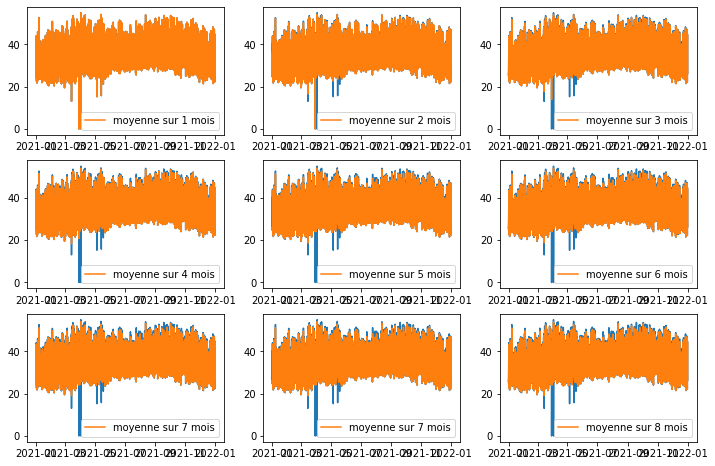

In [20]:
win = [1, 2, 3, 4, 5, 6, 7, 7, 8]
fig = plt.figure(figsize=(12,8))

for i in range(len(win)):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(x)
    ax.plot(x.rolling(win[i], center=True).mean(), label=f"moyenne sur {win[i]} mois")
    ax.legend()

LA SAISONNALITE
Il designe une tendance hebdomadaires,mensuelles,trimestrielles ou annuelles

In [21]:
plt.figure(figsize=(12, 6))

yrs = [str(yr) for yr in x.index.month_name().unique()]
day = x.index.day.tolist()
colors = plt.cm.inferno(np.linspace(0,1,len(yrs)))

for i in range(len(yrs)):
    plt.plot(day, x.loc[yrs[i]], label=yrs[i], color=colors[i])
    plt.legend(bbox_to_anchor=(1,1))

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

<Figure size 864x432 with 0 Axes>

In [24]:
 x.index.month_name().unique()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Date (+00:00)')

In [29]:
#len(x.index.day.to_list())

104872

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

decomp = seasonal_decompose(x, model='additive')

fig = decomp.plot()
fig.set_size_inches((10, 6))
fig.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [36]:
if pd.api.types.is_datetime64_any_dtype(x.index):
    print("L'index est un index temporel valide.")
else:
    print("L'index n'est pas un index temporel valide.")

L'index est un index temporel valide.


c:\Users\ABDOULAHI FAYE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


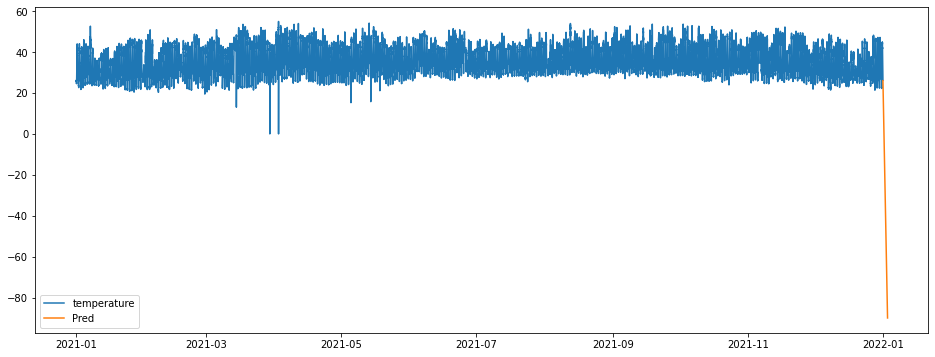

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing

let = ExponentialSmoothing(x.values, seasonal_periods=12, trend='add', seasonal='add').fit()

y_pred = let.forecast(600)# prédiction pour la série log
#x_pred = np.exp(let.forecast(60)) # récupération des prédiction pour la série originale

plt.figure(figsize=(16,6))

plt.plot(x, label='temperature')
plt.plot(pd.date_range(x.index[len(x)-1], periods=600, freq='00h05t'), y_pred, label='Pred')
plt.legend()

"""ax2.plot(x, label='Airpass')
ax2.plot(pd.date_range(y.index[len(y)-1], periods=60, freq='M'), x_pred, label='Pred')
ax2.legend()"""

plt.show()

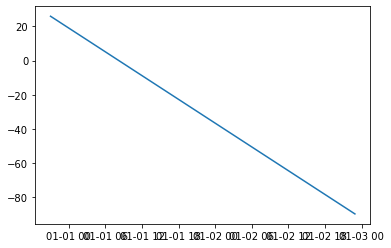

In [39]:
plt.plot(pd.date_range(x.index[len(x)-1], periods=600, freq='00h05t'), y_pred, label='Pred')

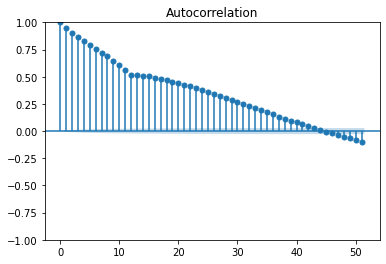

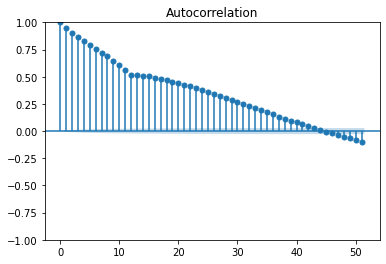

In [45]:
y_diff_12 = x - x.shift(12)
plot_acf(y_diff_12[12:])#, fig_size=(9,5))

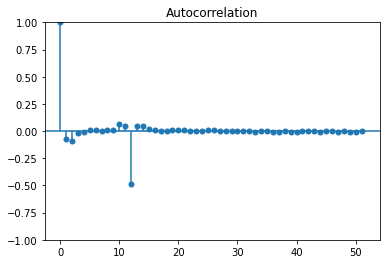

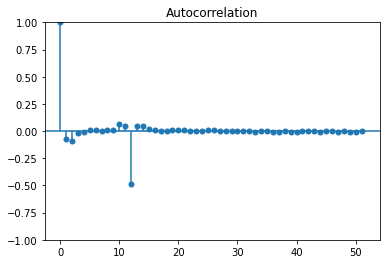

In [47]:
y_diff_12_1 = y_diff_12 - y_diff_12.shift(1)
plot_acf(y_diff_12_1[13:])#, fig_size=(9,5))

In [ ]:
fct.ts_plot(y_diff_12_1[13:].Airpass, fig_size=(10,7))

In [53]:
from statsmodels.tsa.statespace.sarimax import *

m1 = SARIMAX(x.values, order=(1,1,1), seasonal_order=(1,1,1,12))
res1 = m1.fit(disp=False)
print(res1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:               104872
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -94059.474
Date:                            Wed, 03 May 2023   AIC                         188128.947
Time:                                    02:58:06   BIC                         188176.749
Sample:                                         0   HQIC                        188143.423
                                         - 104872                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9729      0.001    735.948      0.000       0.970       0.975
ma.L1         -0.9380      0.001   

In [54]:
m2 = SARIMAX(x.values, order=(1,1,1), seasonal_order=(0,1,1,12))
res2 = m2.fit(disp=False)
print(res2.summary())

MemoryError: Unable to allocate 583. MiB for an array with shape (27, 27, 104872) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 988, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 583. MiB for an array with shape (27, 27, 104872) and data type float64


AttributeError: Memoryview is not initialized

In [55]:
m3 = SARIMAX(x.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res3 = m3.fit(disp=False)
print(res3.summary())

MemoryError: Unable to allocate 583. MiB for an array with shape (27, 27, 104872) and data type float64

In [56]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(lag, acorr_ljungbox(res1.resid, lags=lag, return_df=False)[1].mean()))

Retard : p-value
6 : 1.5799134047820578e-108
12 : 7.899567023910289e-109
18 : 5.266378015940193e-109
24 : 3.9497835119551444e-109
30 : 3.159826809564115e-109
36 : 2.6331890079700963e-109


In [57]:
from scipy.stats import shapiro
shapiro(res1.resid[13:])

c:\Users\ABDOULAHI FAYE\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.47720348834991455, pvalue=0.0)

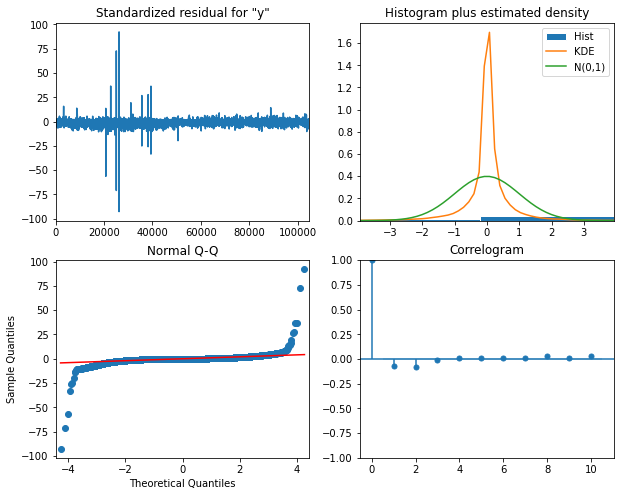

In [58]:
res1.plot_diagnostics(figsize=(10, 8));

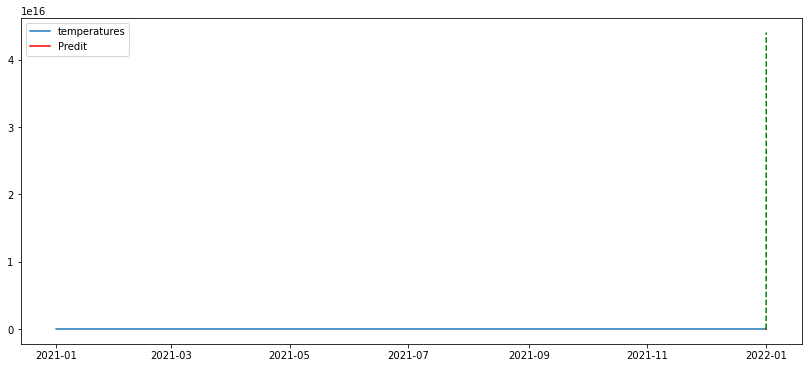

In [60]:
 #prédiction et intervalles de confiance
y_pred = res1.get_forecast(60)
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# affichage
plt.figure(figsize=(14,6))
plt.plot(x.index, x.values, label='temperatures')
plt.plot(pd.date_range(x.index[-1], periods=60, freq='00H05t'), x_pred, color='r', label='Predit')
plt.plot(pd.date_range(x.index[-1], periods=60, freq='00H05t'), x_pred_inf, color='g', linestyle='--')
plt.plot(pd.date_range(x.index[-1], periods=60, freq='00H05t'), x_pred_sup, color='g', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# série x : série des passagers
x_train = x.loc[:'1958', 'Airpass']
x_test = x.loc['1959':, 'Airpass']
# série y=log(x) : transformation logarithmique de la série des passagers 
y_train = y.loc[:'1958', 'Airpass']
y_test = y.loc['1959':, 'Airpass']

# modélisation et summary
model = SARIMAX(y_train.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res = model.fit(disp=False)
print(res.summary())

# test d'autocorrélation des résidus
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(lag, acorr_ljungbox(res.resid, lags=lag, return_df=False)[1].mean()))

# test de normalité des résidus
print(shapiro(res.resid[13:]))

# prédiction et intervalles de confiance
y_pred = res.get_forecast(len(y_test))
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# graphique
plt.figure(figsize=(14,6))
plt.plot(x_test.index, x_test.values, label='Passagers')
plt.plot(x_test.index, x_pred, color='r', label='Predit')
plt.plot(x_test.index, x_pred_inf, color='g', linestyle='--')
plt.plot(x_test.index, x_pred_sup, color='g', linestyle='--')
plt.legend()
plt.show()

# métriques
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))

In [ ]:
from statsmodels.tsa.statespace.sarimax import *
from tqdm import tqdm
import itertools

import warnings
warnings.filterwarnings(action='ignore') #'once' pour afficher le warning une seule fois

# on génère toutes les combinaisons possibles des paramèters
p = d = q = P = D = Q = range(2)
params = list(itertools.product(p, d, q, P, D, Q))

# on initialise nos paramètres optimaux
tmp_model = None
best = {}
best['aic'] = {'pdq': None, 'PDQ':None, 'model':None, 'aic':np.inf, 'bic':np.inf}
best['bic'] = {'pdq': None, 'PDQ':None, 'model':None, 'aic':np.inf, 'bic':np.inf}

for p,d,q,P,D,Q in tqdm(params):
    tmp_model = SARIMAX(y_train,
                        order = (p,d,q),
                        seasonal_order = (P,D,Q,12),
                        enforce_stationarity=True,
                        enforce_invertibility=True)
    res = tmp_model.fit(disp=False)

    if res.aic < best['aic']['aic']:
        best['aic']['aic'] = res.aic
        best['aic']['bic'] = res.bic
        best['aic']['pdq'] = (p,d,q)
        best['aic']['PDQ'] = (P,D,Q)
        best['aic']['model'] = res

    if res.bic < best['bic']['bic']:
        best['bic']['aic'] = res.aic
        best['bic']['bic'] = res.bic
        best['bic']['pdq'] = (p,d,q)
        best['bic']['PDQ'] = (P,D,Q)
        best['bic']['model'] = res

print(f"Modèle retenu selon le critère AIC : SARIMA{best['aic']['pdq']}{best['aic']['PDQ']}12 - AIC:{best['aic']['aic']} - BIC:{best['aic']['bic']}")
print(f"Modèle retenu selon le critère BIC : SARIMA{best['bic']['pdq']}{best['bic']['PDQ']}12 - AIC:{best['bic']['aic']} - BIC:{best['bic']['bic']}")

In [ ]:
Modèle retenu selon le critère AIC : SARIMA(0, 1, 1)(1, 0, 1)12 - AIC:-405.4220890824692 - BIC:-394.3055951100231
Modèle retenu selon le critère BIC : SARIMA(0, 1, 1)(1, 0, 1)12 - AIC:-405.4220890824692 - BIC:-394.3055951100231

In [ ]:
# modèle retenu
res = best['aic']['model']

# summary
print(res.summary())

# résidus
res.plot_diagnostics(figsize=(14, 10));
print("Test de Shapiro :", shapiro(res.resid[13:]))

# prédiction et intervalles de confiance
y_pred = res.get_prediction(start=pd.to_datetime('1958-12-01'), end=pd.to_datetime('1960-12-01'))
x_pred = np.exp(y_pred.predicted_mean)
pred_CI = np.exp(y_pred.conf_int())

# affichage
ax = x['1949':].plot(label='Série observée', color='darkturquoise', figsize=(14,6))
x_pred.plot(ax=ax, label='Prévisions', color='deeppink')

# affichage de l'intervalle de confiance
ax.fill_between(pred_CI.index,
                pred_CI.iloc[:, 0],
                pred_CI.iloc[:, 1], color='plum', alpha=.25)

# un peu de style
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), x.index[-1], alpha=.1, zorder=-1, color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Passagers')
plt.legend(loc='upper left')
plt.show()

# métriques
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))